<a href="https://colab.research.google.com/github/Ghzraza/Single-Cell-RNA-sequencing-/blob/main/ScRNA_seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

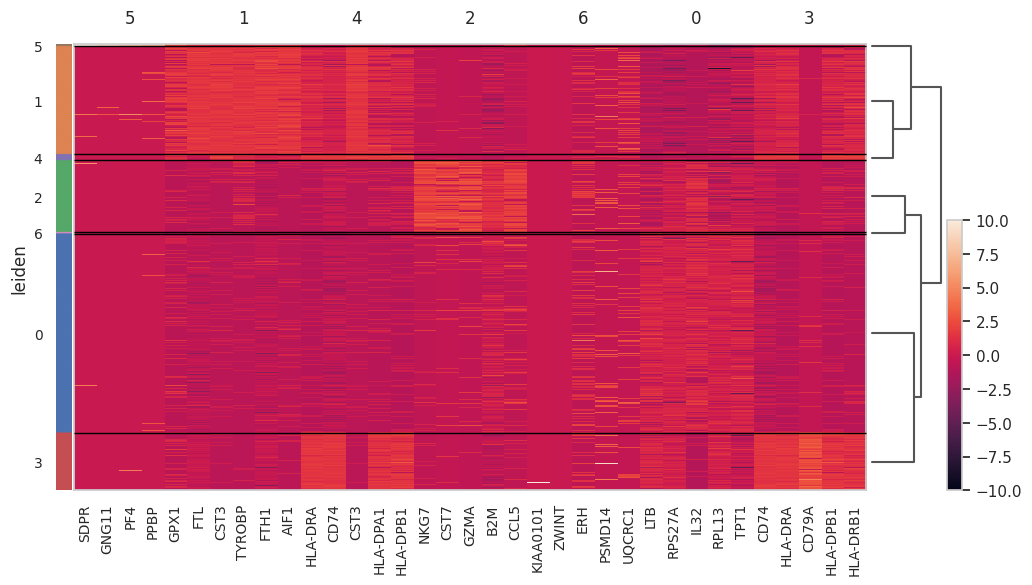

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


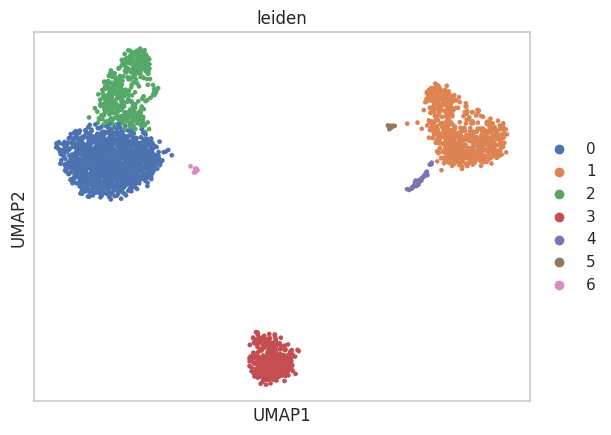

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: 

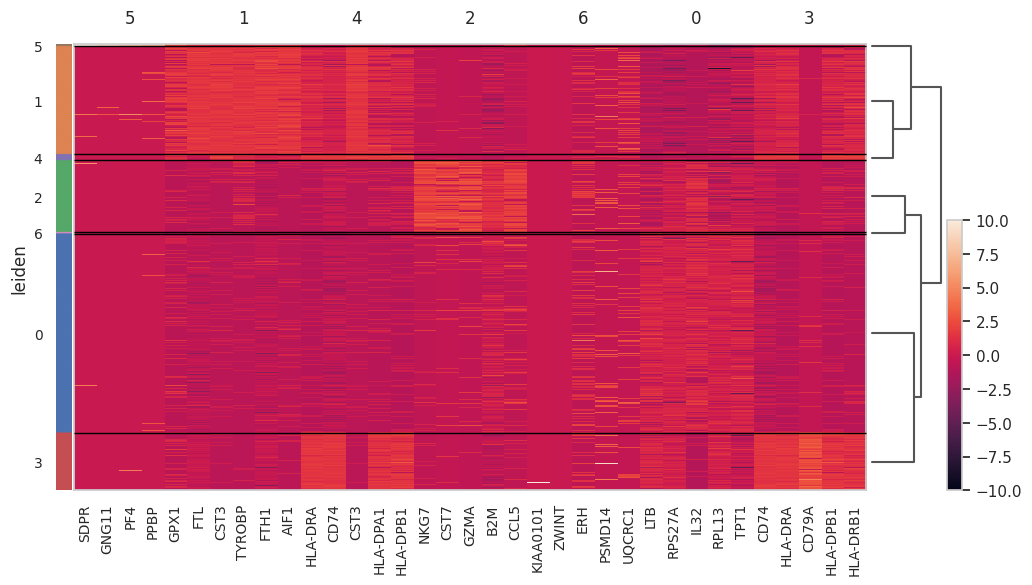

In [ ]:
sc.tl.dendrogram(adata, groupby='leiden')
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, groupby='leiden', dendrogram=True, save='_marker_heatmap.png')

# 1. Install scanpy (if needed)
!pip install scanpy --quiet
!pip install scanpy python-igraph leidenalg --quiet

# 2. Import packages
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# 3. Load sample data
adata = sc.datasets.pbmc3k()  # built-in 3k PBMC dataset in Scanpy

# 4. Preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)
adata = adata[adata.obs['pct_counts_mt'] < 5, :]  # remove high mitochondrial cells
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var['highly_variable']]

# 5. Dimensionality Reduction
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

# 6. Clustering
sc.tl.leiden(adata, resolution=0.5)

# 7. Visualization
sc.pl.umap(adata, color=['leiden'], save='_cluster_umap.png')

# 8. Marker Gene Identification
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, groupby='leiden', save='_marker_heatmap.png')

# 9. Export cluster assignments
import os

# Create results folder if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Now save the file
adata.obs[['leiden']].to_csv('../results/cluster_assignments.csv')
adata.obs[['leiden']].to_csv('../results/cluster_assignments.csv')
